<a href="https://colab.research.google.com/github/tramyynt/Printer-Sale/blob/main/Formlabs_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np
import calendar
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Data Importing and Cleaning

In [109]:
data = pd.read_csv('/content/drive/MyDrive/DataAnalystIntern_CaseStudy_Data.csv', delimiter = ';')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848 entries, 0 to 847
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Customer ID           848 non-null    object
 1   Order ID              848 non-null    object
 2   Order Status          848 non-null    object
 3   Order Approval Date   848 non-null    object
 4   Order Delivered Date  401 non-null    object
 5   Product Code          848 non-null    object
 6   Product Name          848 non-null    object
 7   Product Quantity      848 non-null    object
 8   Product Ship Date     848 non-null    object
dtypes: object(9)
memory usage: 59.8+ KB


In [ ]:
data.isna().sum()

Customer ID               0
Order ID                  0
Order Status              0
Order Approval Date       0
Order Delivered Date    447
Product Code              0
Product Name              0
Product Quantity          0
Product Ship Date         0
dtype: int64

In [110]:
#convert string to int by replacing comma
data['Product Quantity'] = data['Product Quantity'].apply(lambda x: x.replace(',','.'))
data['Product Quantity'] = data['Product Quantity'].astype(float)
data['Product Quantity'] = data['Product Quantity'].astype(int)

In [65]:
data.head(5)

,Customer ID,Order ID,Order Status,Order Approval Date,Order Delivered Date,Product Code,Product Name,Product Quantity,Product Ship Date
0,11Y31JDd9,15d02hi1J,complete,31.12.2021,19.01.2022 15:40,FH-WA-01,Form Wash,1,13.01.2022 01:00
1,11Y31JDd9,15d02hi1J,complete,31.12.2021,19.01.2022 15:40,FH-CU-01,Form Cure,1,06.01.2022 01:00
2,11Y2uLTX8,15d02hhwE,complete,31.12.2021,19.01.2022 09:59,F3B-P-PRINTER,Form 3B+ 3D Printer,1,05.11.2025 01:00
3,11Y2uLTX8,15d02hhwE,complete,31.12.2021,19.01.2022 09:59,FH-WA-01,Form Wash,1,06.01.2022 01:00
4,11Y2uLTX8,15d02hhwE,complete,31.12.2021,19.01.2022 09:59,FH-CU-01,Form Cure,1,06.01.2022 01:00


##Customer with the quantity of each product and the order status

In [39]:
def record_cus (customer, df):
  record = df[df['Customer ID']== customer]
  return record

In [40]:
def get_index(arr, productId):
  index = np.where(arr == productId)
  return index[0][0]

In [9]:
"""
Save each customer with their orders with product quantity and status to dict
"""

list_customer = data['Customer ID'].unique()
list_product = data['Product Code'].unique()
a = {}
for i in list_customer:
  record = record_cus(i, data)
  ci = {}
  for j in range(len(record.index)):
    order_id = record.iloc[j,:]['Order ID']
    product_id = record.iloc[j,:]['Product Code']
    if not order_id in ci:
      ci[order_id] = np.empty(len(list_product), dtype=object)
    index = get_index(list_product,product_id)
    ci[order_id][index] = [record.iloc[j,:]['Product Name'],record.iloc[j,:]['Product Quantity'], record.iloc[j,:]['Order Status']]
  a[i] = ci


In [10]:
from sys import path
"""
Save to excel file
"""
import openpyxl

# Create the workbook and sheet for Excel
workbook = openpyxl.Workbook()
sheet = workbook.active

row = 1
column = 1
sheet.cell(row = row, column = column, value = "CustomerId")
column += 1
sheet.cell(row = row, column = column, value = "OrderId")
column += 1

for p in list_product:
  sheet.cell(row = row, column = column, value = p)
  column += 1

sheet.cell(row = row, column = column, value = "Status")
row += 1

for customerId in a.keys():
  # Put the key in the first column for each key in the dictionary
  sheet.cell(row=row, column=1, value=customerId)
  column = 2
  sum_arr = np.array([0]*len(list_product))
  for orderId in a[customerId]:
    #put order id in the first column
    sheet.cell(row = row, column = column, value = orderId)
    column = column +1

    s = "complete"
    arr = []

    for k in a[customerId][orderId]:
      if k == None:
        sheet.cell(row = row, column = column, value =0)
        arr.append(0)
      else:
        if k[2] != 'complete':
          s = "incomplete"
        sheet.cell(row = row, column = column, value = k[1])
        arr.append(k[1])
      column = column + 1

    sum_arr = sum_arr + arr
    sheet.cell(row = row, column = column, value = s)
    row = row +1
    column = 2

#calculate sum of each product for each customer
  column = 3
  for total in sum_arr:
    sheet.cell(row = row, column = column, value = total)
    column = column +1
  row = row +1

workbook.save(filename="my_workbook.xlsx")

##Customer with the total number of orders and products

In [11]:
data.groupby('Customer ID')['Order ID','Product Code'].nunique()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Order ID,Product Code
Customer ID,,
11Y2FaW5I,1,1
11Y2FakFP,1,3
11Y2FbEqW,1,1
11Y2FbLzm,1,2
11Y2FbMEp,1,1
...,...,...
1if2UoW,1,1
1iqNlAT,5,4
1iqNlIf,1,1


## EDA- Exploratory Data Analysis

In [111]:
#convert data type of Date to datetime
data['Order Approval Date'] = pd.to_datetime(data['Order Approval Date'], utc= True, format= '%d.%m.%Y').dt.date
data['Order Approval Date'] = pd.to_datetime(data['Order Approval Date'])


In [112]:
#get day from Approval date
data['Order Approval Day'] = data['Order Approval Date'].dt.day_name()

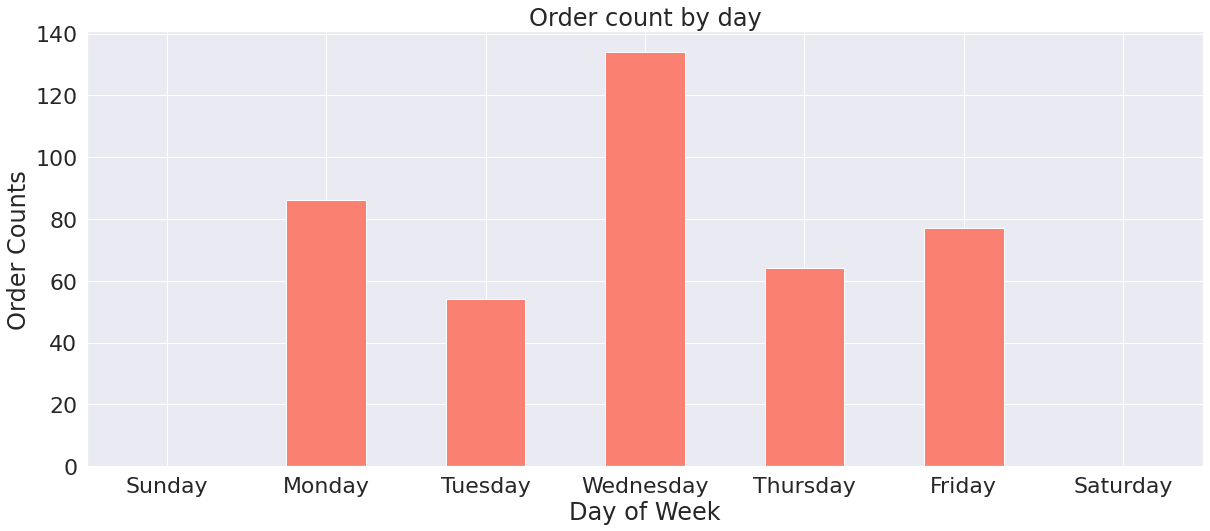

In [75]:
cate = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
plt.figure(figsize=(20,8))
data.groupby('Order Approval Day')['Order ID'].nunique().reindex(cate).plot(kind = 'bar', color='salmon')
plt.title('Order count by day')
plt.xticks(rotation = 360)
plt.xlabel('Day of Week')
plt.ylabel('Order Counts')
#plt.show()
plt.savefig('Order count by day.png')

In [172]:
# Top 10 loyal customers with the most orders.
top10_customer = data.groupby('Customer ID')['Order ID'].nunique().sort_values(ascending= False).head(10)
topcus = top10_customer.to_frame()

In [174]:
topcus.to_excel("output.xlsx") 

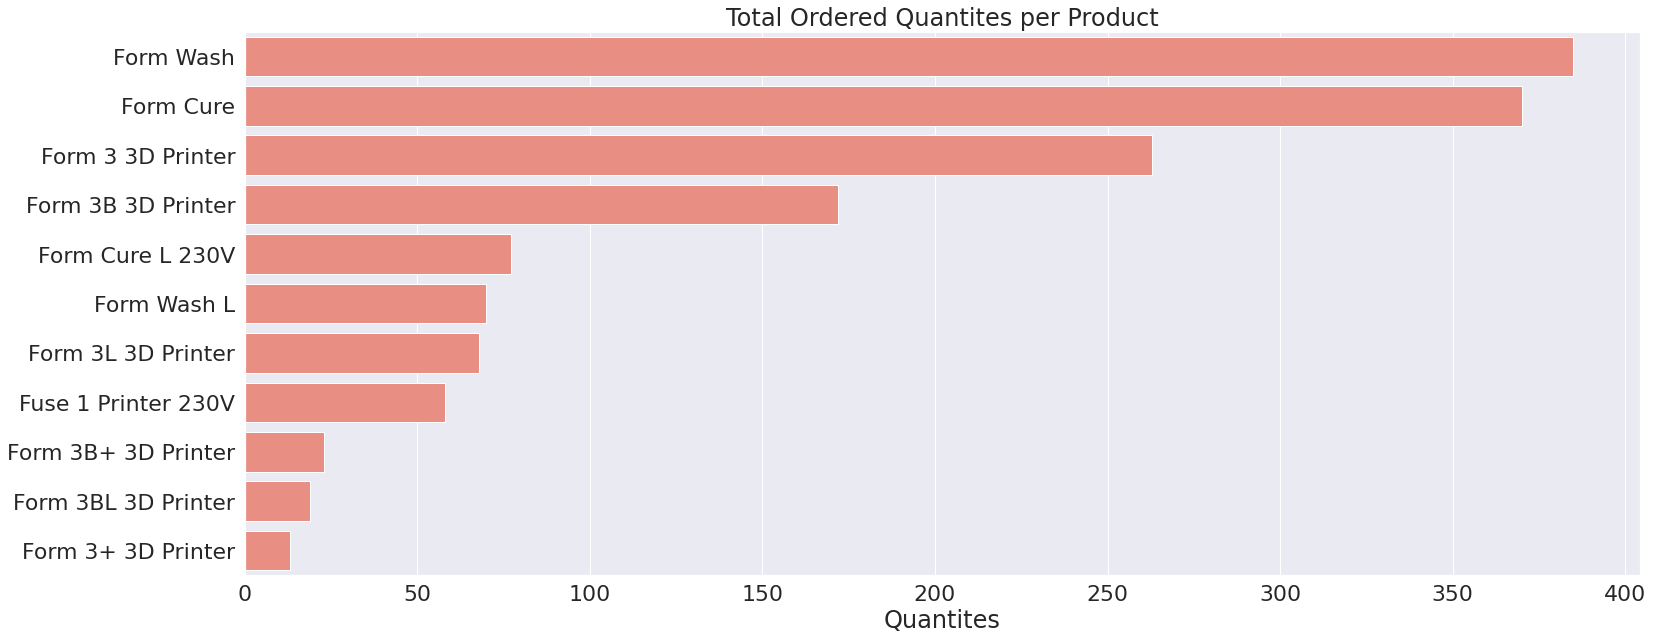

In [80]:
#Total ordered quantities per product
top_product = data.groupby('Product Name').agg({'Product Quantity': 'sum'}).sort_values('Product Quantity', ascending = False)
plt.figure(figsize=(25,10))
sns.set(font_scale = 2)
sns.barplot(data = top_product, y = top_product.index, x = 'Product Quantity', color = 'salmon')
plt.xlabel('Quantites')
plt.ylabel('')
plt.title('Total Ordered Quantites per Product', fontsize = 24)

plt.savefig('Quantities per product.png')

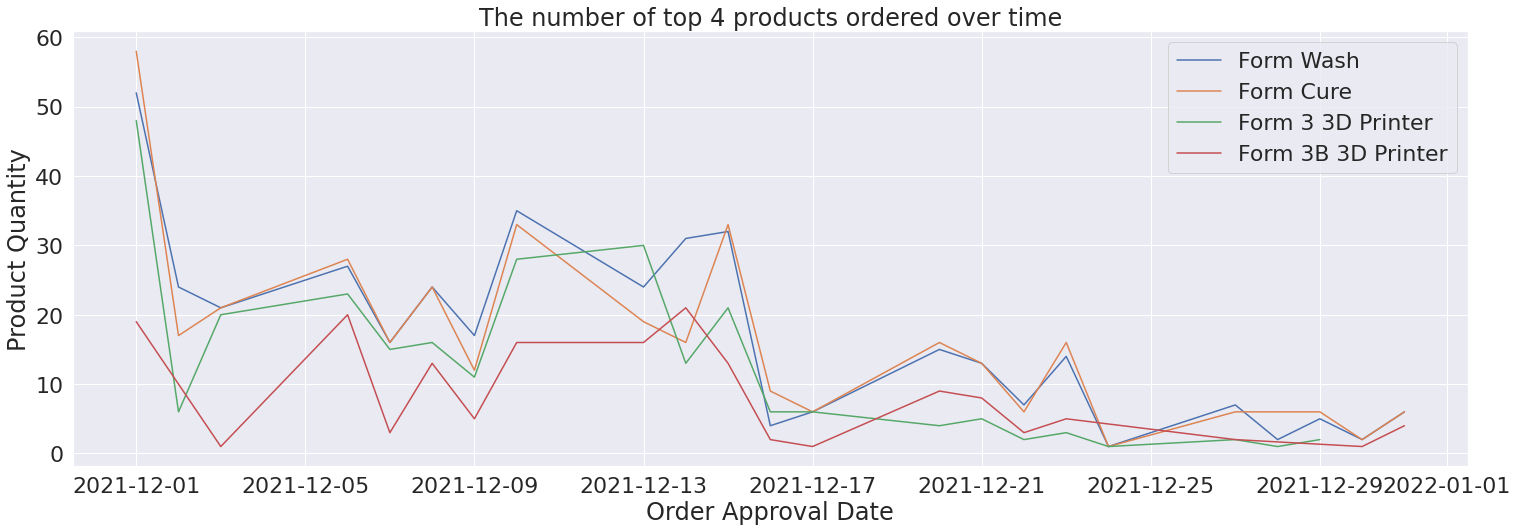

In [85]:
from IPython.core.pylabtools import figsize
top4_product = top_product.head(4)
f, ax = plt.subplots(nrows=1, ncols = 1, figsize = (25,8))
for i in top4_product.index:
  temp = data[data['Product Name']== i].groupby('Order Approval Date').agg({'Product Quantity': 'sum'})
  sns.lineplot(data = temp, y = temp['Product Quantity'], x = temp.index, label = i)

ax.set_title('The number of top 4 products ordered over time')
plt.legend()
plt.savefig('The quantity of top 4 products over time.png')

In [113]:
#Average time taken per product to be shipped
data['Product Ship Date_Convert'] = pd.to_datetime(data['Product Ship Date'], utc= True, format= '%d.%m.%Y %H:%M').dt.date
data['Product Ship Date_Convert'] = pd.to_datetime(data['Product Ship Date_Convert'])

diff = data['Product Ship Date_Convert'] - data['Order Approval Date']
diff = diff.astype(str)
diff = diff.apply(lambda x: x.replace('days',''))
diff = diff.astype(int)
data['diff']=diff

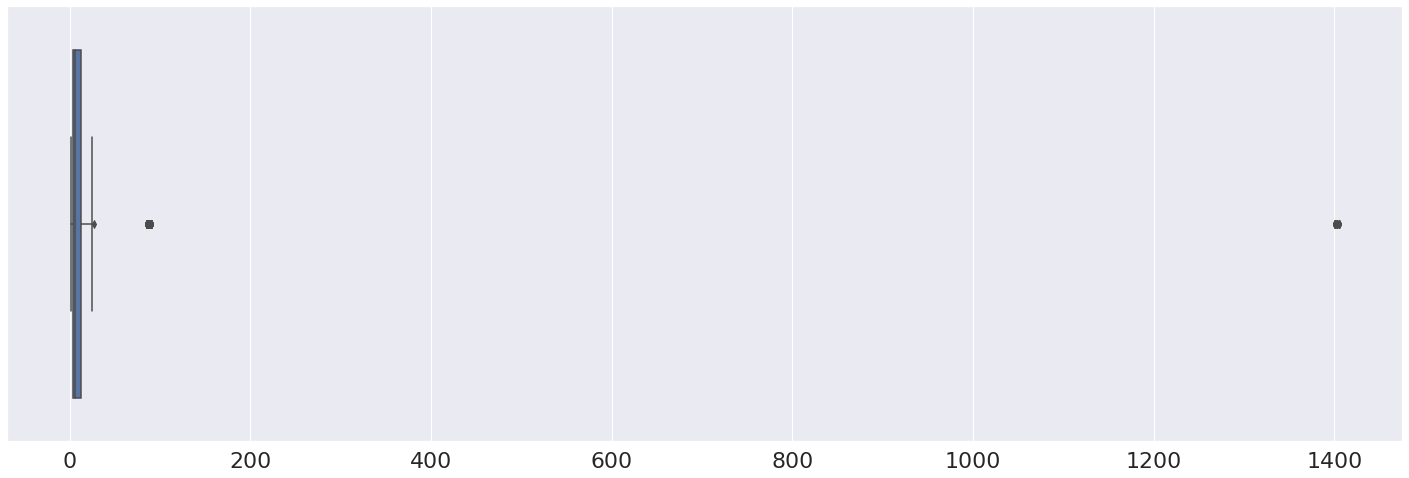

In [122]:
f,ax = plt.subplots(nrows=1, ncols = 1, figsize=(25,8))
sns.boxplot(x=diff)
plt.show()

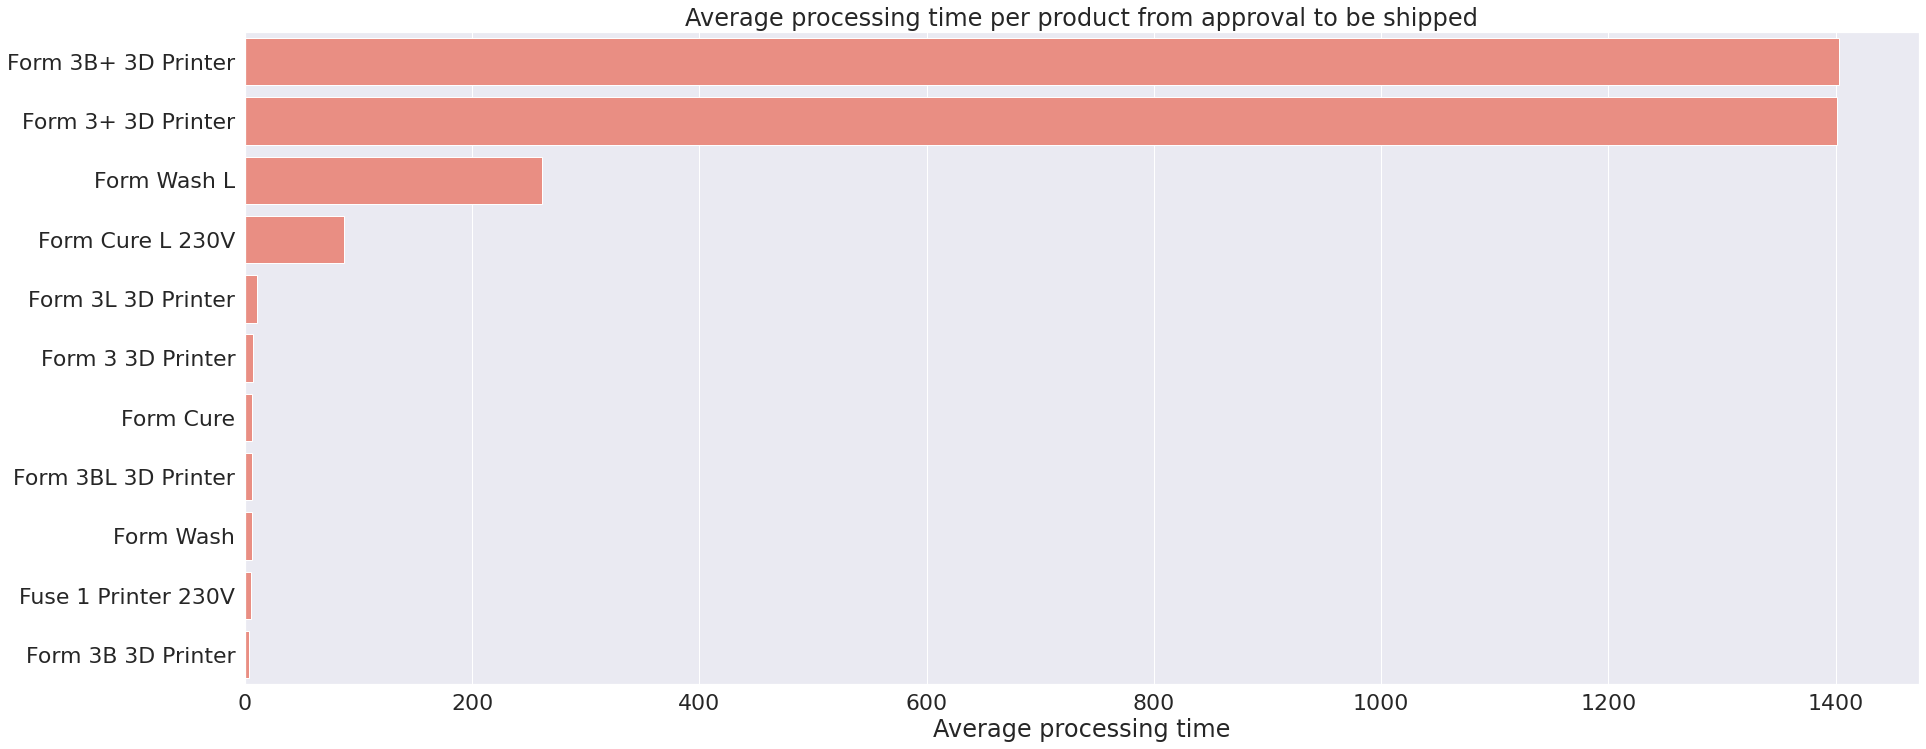

In [141]:
mean_time = data.groupby('Product Name').agg({'diff': 'mean'}).sort_values('diff',ascending=False)
plt.figure(figsize=(30,12))
sns.set(font_scale = 2)
sns.barplot(data = mean_time, y = mean_time.index, x = 'diff', color = 'salmon')
plt.xlabel('Average processing time')
plt.ylabel('')
plt.title('Average processing time per product from approval to be shipped', fontsize = 24)

plt.savefig('Average processing time per product.png')

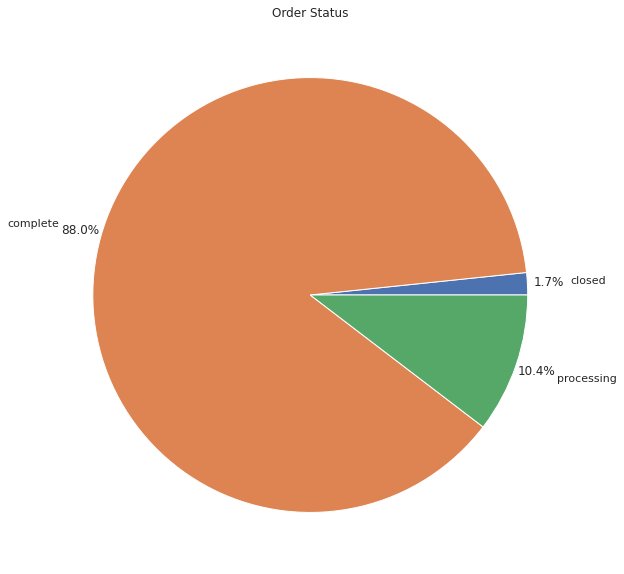

In [170]:
#order status
status = data.groupby('Order Status').count()['Order ID'].to_frame()
status['percent']= status['Order ID']/ status['Order ID'].sum()*100

plt.figure(figsize = (25,10))
sns.set(font_scale=1.0)
status['percent'].plot.pie(autopct ='%1.1f%%', pctdistance = 1.1, labeldistance = 1.2)
plt.title('Order Status')
plt.ylabel('')
plt.savefig('Order Status.png')